<a href="https://colab.research.google.com/github/vcshaffe/MAT-421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20.1 Numerical Differentiation Problem Statement

Numerical Grid - Evenly spaced set of points over the domain of a function over some interval.

Spacing / Step Size - Distance between adjacent points on a numerical grid.

# 20.2 Finite Difference Approximating Derivatives

From the definition of a derivative at a point x=a, the derivative x=a is the slope of the function at that point. 

Finite difference approximation - Use values of the function in the neighborhood of the point x=a to achieve the goal.

There are various finite difference formulas we can use to create this approximation such as forward f(x_xj+1) - f(x_j)/x_j+1 -xj, backward f(x_j) - f(x_j-1) xj-x_j-1, and central f(x_j+1) - f(x_j-1) / x_j+1 - x_j-1 differences.

**Finite Difference Approximating Derivatives with Taylor Series**

We use O(h) where h = x_j+1 - x_j, so O(h) = h(α + ϵ(h))

O(h) describes the accuracy of the forward difference formula, and for an approximatio that is O(h^p), we say that p is the order of the accuracy of the approximation

Forward Difference Taylor Approx:
f'(x_j) = ((f(x_j+1) - f(x_j))/h

Backward Difference:
f'(x_j) = ((f(x_j) - f(x_j-1))/h

Central Difference:
f'(x_j) = ((f(x_j+1) - f(x_j-1))/2h

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

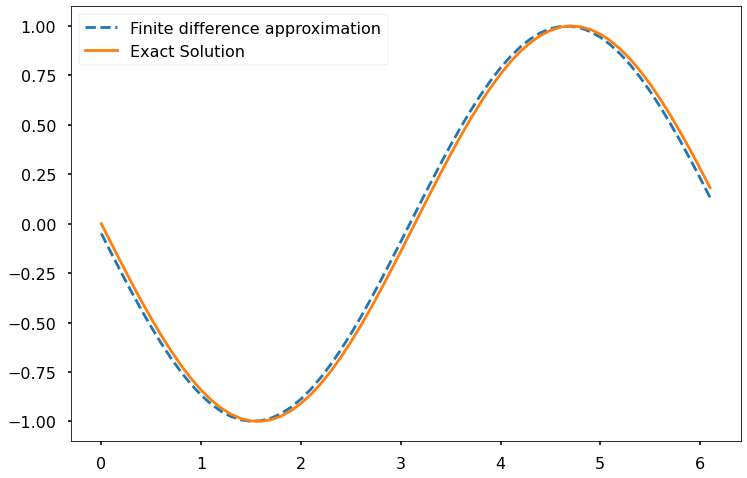

Max error 0.049984407218554114


In [10]:
h = 0.1
x = np.arange(0, 2*np.pi, h)
y = np.cos(x)

f_diff = np.diff(y)/h
x_diff = x[:-1:]
exact_solution = -np.sin(x_diff)

plt.figure(figsize = (12, 8))
plt.plot(x_diff, f_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact Solution')
plt.legend()
plt.show()

max_error = max(abs(exact_solution - f_diff))
print("Max error",max_error)

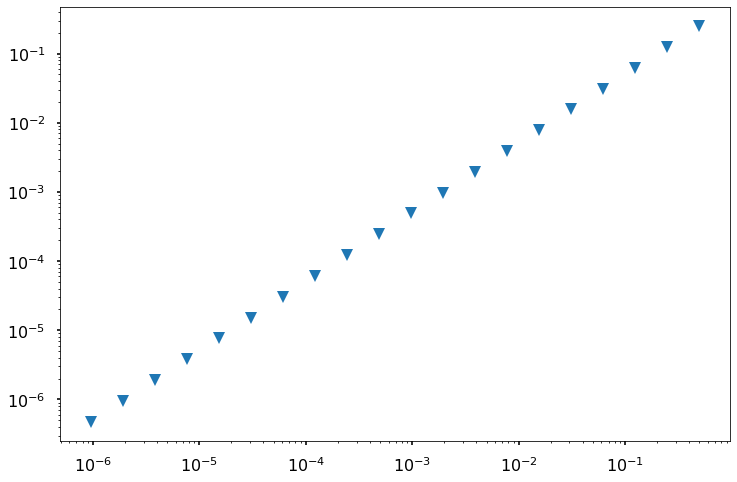

In [11]:
h = 1
iter = 20
step_size = []
max_error = []

for i in range(iter):
  h /= 2
  step_size.append(h)
  x = np.arange(0, 2*np.pi, h)
  y = np.cos(x)
  f_diff = np.diff(y)/h
  x_diff = x[:-1]
  exact_solution = -np.sin(x_diff)

  max_error.append(\
                   max(abs(exact_solution - f_diff)))
  
plt.figure(figsize = (12, 8))
plt.loglog(step_size, max_error, 'v')
plt.show()

In this example, the slope of the line in log-log is 1, so the error is proportional to h^1, which means the forward difference formula is O(h).

# 20.3 Approximating of Higher Order Derivatives

We can use Taylor series to approximate higher order derivatives. For example, taking a Taylor series at a = x_j, then computing it at x = x_j-1 and x_j+1 gives

f(x_j-1) + f(x_j+1) = 2f(x_j) + h^2f''(x_j) + ((h^4 f''''(x_j))/24 + ...

With some rearrangement, the approximation f''(x_j) = ((f(x_j+1) - 2f(x_j) + f(x_j-1))/h^2, and is O(h^2).

# 20.4 Numerical Differentiation with Noise

Sometimes data contains noise, so its value is off by a small amount from a pure mathematical function.

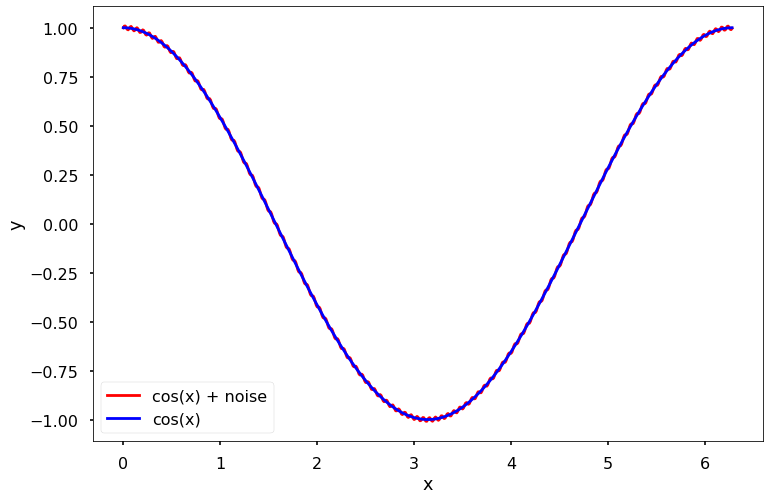

In [14]:
from ast import increment_lineno
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

x = np.arange(0, 2*np.pi, 0.01)

omega = 100
epsilon = 0.01

y = np.cos(x)
y_noise = y + epsilon*np.sin(omega*x)

plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

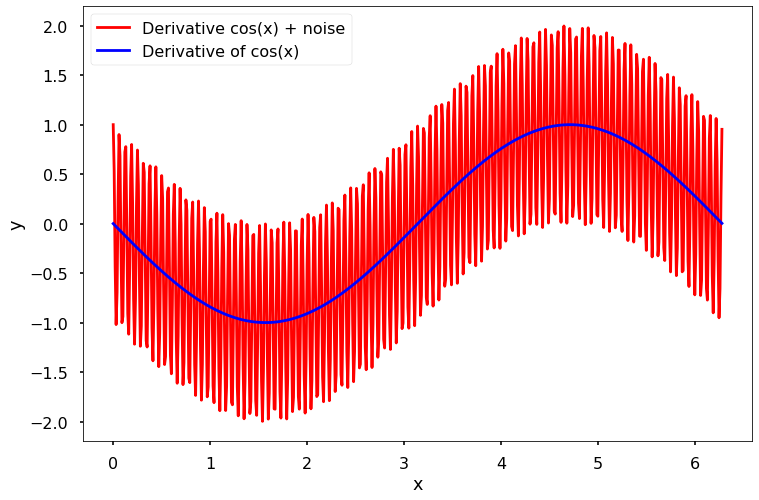

In [15]:
x = np.arange(0, 2*np.pi, 0.01)
y = -np.sin(x)
y_noise = y + epsilon*omega*np.cos(omega*x)

plt.figure(figsize = (12,8))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

In some cases (like the one above), the derivative may not be usable especially when the noise (epsilon * omega) gets too large.